In [1]:
!pip install prophet
!pip install matplotlib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

In [10]:
df = pd.read_csv("/content/sample_data/sales_data_sample.csv", encoding='latin1')

In [11]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [12]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [13]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
df.dtypes

,0
ORDERNUMBER,int64
QUANTITYORDERED,int64
PRICEEACH,float64
ORDERLINENUMBER,int64
SALES,float64
ORDERDATE,datetime64[ns]
STATUS,object
QTR_ID,int64
MONTH_ID,int64
YEAR_ID,int64


In [14]:
daily_sales = df.groupby('ORDERDATE')['SALES'].sum().reset_index()
daily_sales.head()

,ORDERDATE,SALES
0,2003-01-06,12133.25
1,2003-01-09,11432.34
2,2003-01-10,6864.05
3,2003-01-29,54702.00
4,2003-01-31,44621.96


In [15]:
daily_sales = daily_sales.rename(columns={
    'ORDERDATE': 'ds',
    'SALES': 'y'
})

daily_sales.head()

,ds,y
0,2003-01-06,12133.25
1,2003-01-09,11432.34
2,2003-01-10,6864.05
3,2003-01-29,54702.00
4,2003-01-31,44621.96


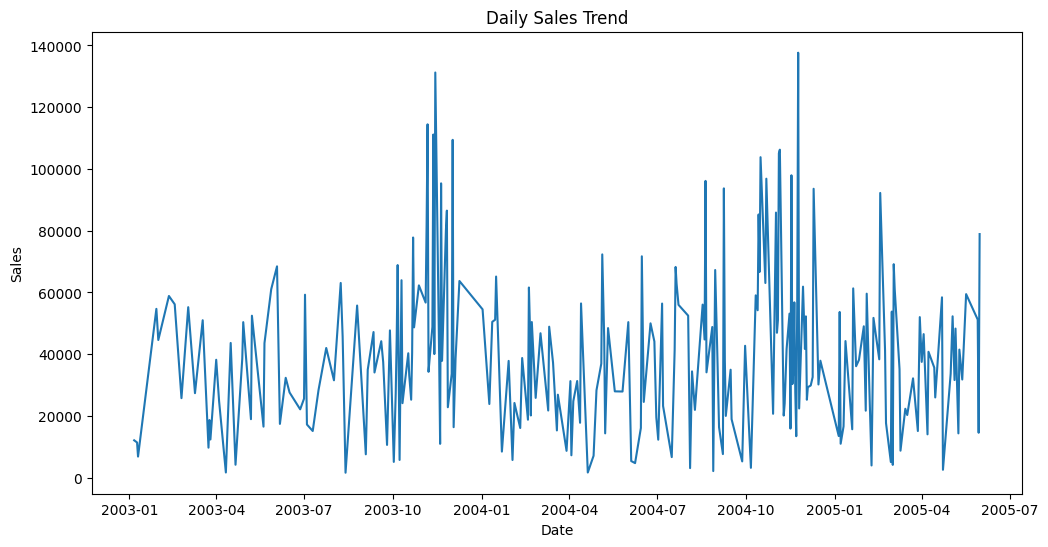

In [19]:
plt.figure(figsize=(12,6))
plt.plot(daily_sales['ds'], daily_sales['y'])
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

In [21]:
#traininjg prophet model

model = Prophet()
model.fit(daily_sales)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Create Future Dates (Forecast 90 Days)

In [22]:
future = model.make_future_dataframe(periods=90)
future.tail()

,ds
337,2005-08-25
338,2005-08-26
339,2005-08-27
340,2005-08-28
341,2005-08-29


Predict Future Sales

In [23]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
337,2005-08-25,52253.011605,24737.656521,82121.250741
338,2005-08-26,50261.497317,21132.836768,79886.430768
339,2005-08-27,34326.591142,4340.028639,62725.505916
340,2005-08-28,55113.160311,24121.766739,84702.166185
341,2005-08-29,42631.866563,14531.257793,72444.326182


yhat → predicted sales

yhat_lower → lower confidence bound

yhat_upper → upper confidence bound

You’ve:

✅ Cleaned data
✅ Aggregated properly
✅ Trained Prophet
✅ Predicted future sales
✅ Visualized forecast

STEP 6: Analyze Forecast Components (VERY IMPORTANT)

Prediction alone is not enough.

We must understand:

📈 Trend

🔁 Yearly seasonality

🔁 Weekly seasonality

Prophet allows us to break prediction into components.

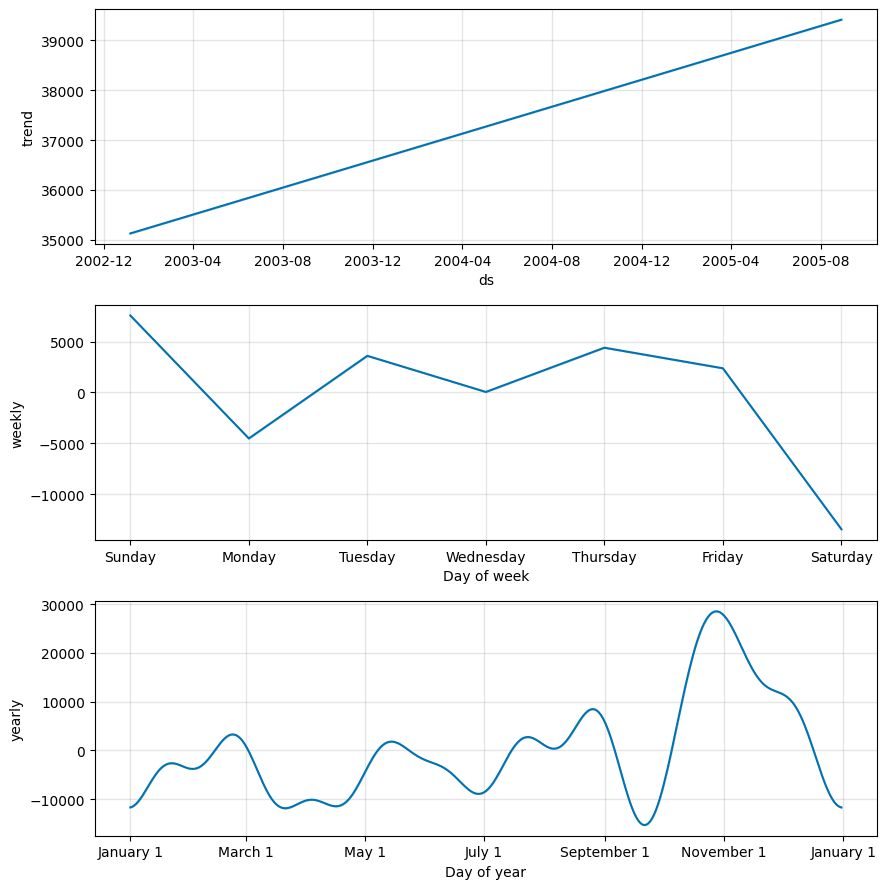

In [24]:
model.plot_components(forecast)
plt.show()

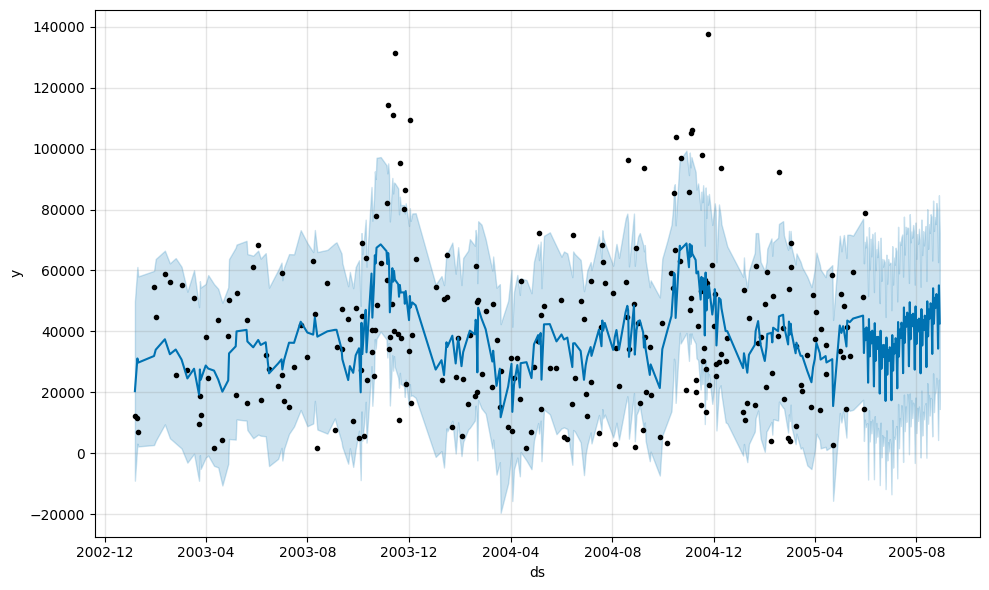

In [25]:
model.plot(forecast)
plt.show()

STEP 7: Model Evaluation (Check Accuracy)

Prediction alone is not enough.
We must check:

👉 How accurate is the model?

STEP 7.1: Split Data (Train & Test)

We will:

Use 80% data for training

Use last 20% for testing

Run this:

In [26]:
train_size = int(len(daily_sales) * 0.8)

train = daily_sales[:train_size]
test = daily_sales[train_size:]

STEP 7.2: Train Model on Training Data

In [27]:
model = Prophet()
model.fit(train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


STEP 7.3: Predict on Test Period

In [28]:
future = model.make_future_dataframe(periods=len(test))
forecast = model.predict(future)

Now extract only test predictions:

In [30]:
predictions = forecast[['ds', 'yhat']].iloc[-len(test):]

STEP 7.4: Calculate Error (MAE)

In [31]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test['y'], predictions['yhat'])
print("MAE:", mae)

MAE: 18292.2478995165


In [41]:
mae = mean_absolute_error(test['y'], predictions['yhat'])
mae = round(mae, 2)
print("MAE:", mae)

MAE: 18292.25


STEP 8 — Compare Actual vs Predicted

Step 8.1 — Combine Actual & Predicted

In [32]:
comparison = test[['ds', 'y']].copy()
comparison['Predicted'] = predictions['yhat'].values

comparison.head()

,ds,y,Predicted
201,2004-12-17,37905.15,48337.282266
202,2005-01-05,13529.57,47821.849029
203,2005-01-06,53690.93,36225.402228
204,2005-01-07,11021.30,49805.928846
205,2005-01-10,16628.16,41262.744164


✅ STEP 8.2 — Print Last Few Values

In [33]:
comparison.tail()

,ds,y,Predicted
247,2005-05-13,31821.90,42168.332941
248,2005-05-17,59475.10,51982.424192
249,2005-05-29,51233.18,50682.434467
250,2005-05-30,14578.75,49393.802505
251,2005-05-31,78918.03,48878.369269


STEP 8.3 — Calculate Percentage Error

This is very important for business understanding.

In [34]:
comparison['Error'] = abs(comparison['y'] - comparison['Predicted'])
comparison['Percentage_Error'] = (comparison['Error'] / comparison['y']) * 100

comparison.head()

,ds,y,Predicted,Error,Percentage_Error
201,2004-12-17,37905.15,48337.282266,10432.132266,27.521675
202,2005-01-05,13529.57,47821.849029,34292.279029,253.461707
203,2005-01-06,53690.93,36225.402228,17465.527772,32.529755
204,2005-01-07,11021.30,49805.928846,38784.628846,351.906117
205,2005-01-10,16628.16,41262.744164,24634.584164,148.149790


STEP 9 — Plot Actual vs Predicted Graph

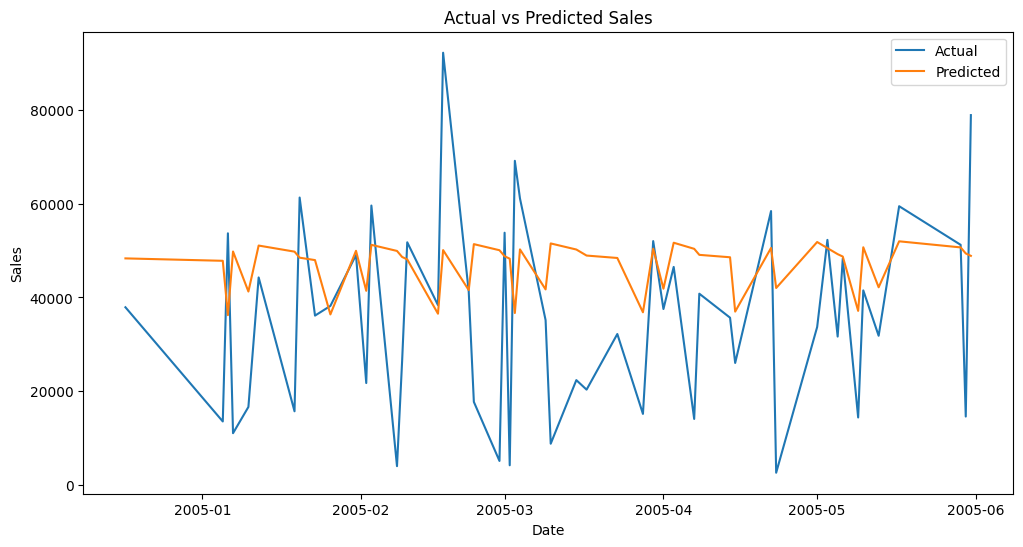

In [35]:
plt.figure(figsize=(12,6))

plt.plot(comparison['ds'], comparison['y'], label='Actual')
plt.plot(comparison['ds'], comparison['Predicted'], label='Predicted')

plt.title("Actual vs Predicted Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()

plt.show()

STEP 10 — Summarize Insights (Very Important for Resume)

- You must write conclusions like this:

📌 Example Project Insights:

- Sales show an overall upward trend over years.

- Weekly and yearly seasonality patterns exist.

- Model performs well on stable periods.

- Performance drops during extreme spikes.

- MAE indicates average deviation of ₹XXXX.

STEP 11 — Forecast Future 90 Days (Final Business Output)

Now train model on FULL data (not split).

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


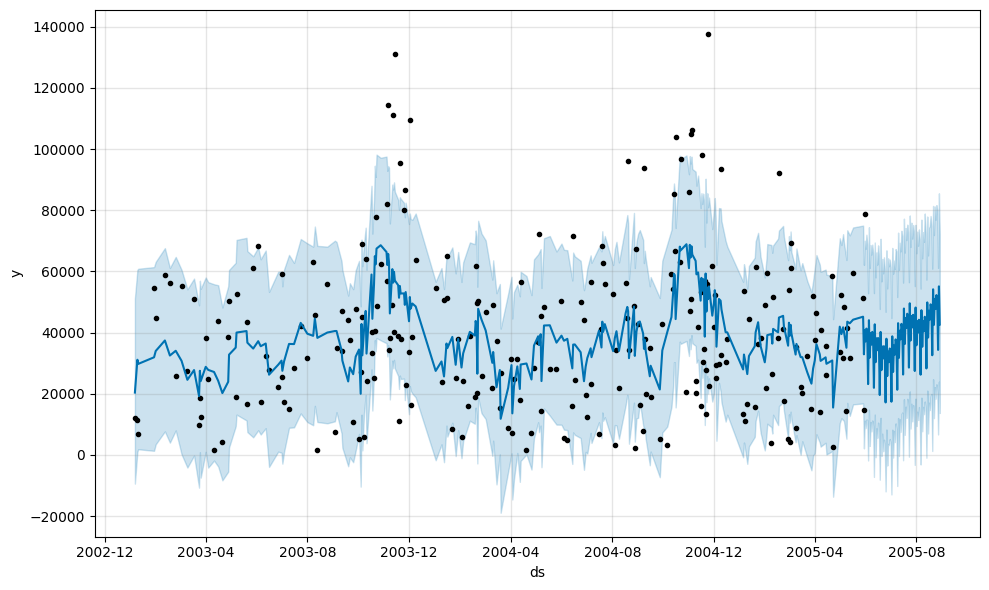

In [36]:
model = Prophet()
model.fit(daily_sales)

future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

model.plot(forecast)
plt.show()

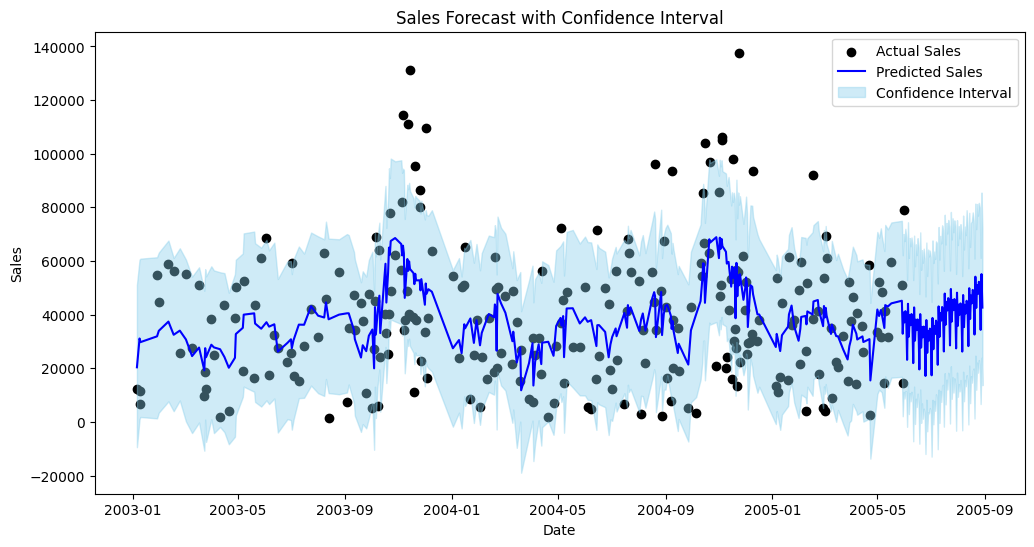

In [39]:
plt.figure(figsize=(12,6))

# Actual values (black dots)
plt.scatter(daily_sales['ds'], daily_sales['y'],
            color='black', label='Actual Sales')

# Predicted line
plt.plot(forecast['ds'], forecast['yhat'],
         color='blue', label='Predicted Sales')

# Confidence interval
plt.fill_between(forecast['ds'],
                 forecast['yhat_lower'],
                 forecast['yhat_upper'],
                 color='skyblue', alpha=0.4,
                 label='Confidence Interval')

plt.title("Sales Forecast with Confidence Interval")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()

plt.show()

In [37]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2003-01-06,35124.043381,-9398.598172,51137.308889,35124.043381,35124.043381,-14751.810855,-14751.810855,-14751.810855,-4528.707038,-4528.707038,-4528.707038,-10223.103817,-10223.103817,-10223.103817,0.0,0.0,0.0,20372.232526
1,2003-01-09,35137.376080,1048.625657,60485.483586,35137.376080,35137.376080,-4028.528117,-4028.528117,-4028.528117,4399.611591,4399.611591,4399.611591,-8428.139709,-8428.139709,-8428.139709,0.0,0.0,0.0,31108.847963
2,2003-01-10,35141.820313,1849.422763,60866.579483,35141.820313,35141.820313,-5389.745142,-5389.745142,-5389.745142,2374.693529,2374.693529,2374.693529,-7764.438671,-7764.438671,-7764.438671,0.0,0.0,0.0,29752.075171
3,2003-01-29,35226.260740,1336.343741,61401.508575,35226.260740,35226.260740,-3308.074253,-3308.074253,-3308.074253,46.198568,46.198568,46.198568,-3354.272821,-3354.272821,-3354.272821,0.0,0.0,0.0,31918.186487
4,2003-01-31,35235.149205,3471.276217,63135.796449,35235.149205,35235.149205,-1257.359927,-1257.359927,-1257.359927,2374.693529,2374.693529,2374.693529,-3632.053456,-3632.053456,-3632.053456,0.0,0.0,0.0,33977.789278


In [38]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
337,2005-08-25,39399.292275,23078.728966,81675.690529,39399.291413,39399.293257,12853.719331,12853.719331,12853.719331,4399.611591,4399.611591,4399.611591,8454.107739,8454.107739,8454.107739,0.0,0.0,0.0,52253.011605
338,2005-08-26,39403.736368,20618.651358,80032.338058,39403.735486,39403.737367,10857.760949,10857.760949,10857.760949,2374.693529,2374.693529,2374.693529,8483.067420,8483.067420,8483.067420,0.0,0.0,0.0,50261.497317
339,2005-08-27,39408.180462,6687.697876,61156.821585,39408.179559,39408.181475,-5081.589320,-5081.589320,-5081.589320,-13459.491311,-13459.491311,-13459.491311,8377.901991,8377.901991,8377.901991,0.0,0.0,0.0,34326.591142
340,2005-08-28,39412.624556,23955.880305,85524.916536,39412.623634,39412.625585,15700.535756,15700.535756,15700.535756,7568.016498,7568.016498,7568.016498,8132.519257,8132.519257,8132.519257,0.0,0.0,0.0,55113.160311
341,2005-08-29,39417.068649,13705.069943,72348.392721,39417.067705,39417.069700,3214.797913,3214.797913,3214.797913,-4528.707038,-4528.707038,-4528.707038,7743.504951,7743.504951,7743.504951,0.0,0.0,0.0,42631.866563


STEP 12 — Export Final 90-Day Forecast

In [40]:
# Keep only future predictions
future_forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(90)

# Rename columns for business clarity
future_forecast = future_forecast.rename(columns={
    'ds': 'Date',
    'yhat': 'Predicted_Sales',
    'yhat_lower': 'Lower_Bound',
    'yhat_upper': 'Upper_Bound'
})

future_forecast.to_csv("final_90_day_forecast.csv", index=False)

future_forecast.head()

,Date,Predicted_Sales,Lower_Bound,Upper_Bound
252,2005-06-01,37102.863325,8764.421813,67407.586017
253,2005-06-02,41300.563980,11555.740452,71998.807676
254,2005-06-03,39130.383799,11355.757334,68774.717994
255,2005-06-04,23156.934699,-1819.697000,52862.103783
256,2005-06-05,44046.236546,14753.623117,74438.199376


In [42]:
import pickle

with open("prophet_model.pkl", "wb") as f:
    pickle.dump(model, f)

In [43]:
daily_sales.to_csv("daily_sales.csv", index=False)